In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
train=pd.read_csv("C:\\Users\\aspire 3\\Desktop\\Term 3 Project\\train.csv")

In [94]:
train.drop(train.columns[[0]], axis=1, inplace=True)

In [95]:
train.Mode_of_Shipment[train.Mode_of_Shipment == 'Flight'] = 1
train.Mode_of_Shipment[train.Mode_of_Shipment == 'Ship'] = 2
train.Mode_of_Shipment[train.Mode_of_Shipment == 'Road'] = 3

C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
train.Product_importance[train.Product_importance == 'high'] = 1
train.Product_importance[train.Product_importance== 'low'] = 2
train.Product_importance[train.Product_importance == 'medium'] = 3

C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
train.Gender[train.Gender == 'F'] = 1
train.Gender[train.Gender== 'M'] = 2

C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
train.Warehouse_block[train.Warehouse_block == 'A'] = 1
train.Warehouse_block[train.Warehouse_block== 'B'] = 2
train.Warehouse_block[train.Warehouse_block == 'C'] = 3
train.Warehouse_block[train.Warehouse_block== 'D'] = 4
train.Warehouse_block[train.Warehouse_block== 'F'] = 5

C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\a

In [99]:
train["Mode_of_Shipment"]= train["Mode_of_Shipment"].astype(int) 
train["Product_importance"]= train["Product_importance"].astype(int) 
train["Gender"]= train["Gender"].astype(int) 
train["Warehouse_block"]= train["Warehouse_block"].astype(int) 

In [100]:
data = train.rename(columns = {"Reached.on.Time_Y.N": "Reached_on_Time_Y_N"})

In [101]:
clustdata=data[(data.Reached_on_Time_Y_N == 1)]

In [102]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(clustdata)
    wcss.append(kmeans.inertia_)

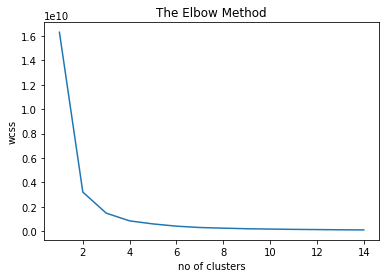

In [103]:
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [104]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++', n_init=10)
c = km.fit_predict(clustdata) 
c


array([1, 1, 0, ..., 1, 1, 1])

In [105]:
clustdata["Cluster"]= c
clustdata.head()

C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N,Cluster
0,4,1,4,2,177,3,2,1,44,1233,1,1
1,5,1,4,5,216,2,2,2,59,3088,1,1
2,1,1,2,2,183,4,2,2,48,3374,1,0
3,2,1,3,3,176,4,3,2,10,1177,1,1
4,3,1,2,2,184,3,3,1,46,2484,1,1


In [106]:
clustdata.groupby(['Cluster']).mean()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
Cluster,,,,,,,,,,,
0,3.344379,1.986993,3.821617,3.020749,208.292970,3.354289,2.336946,1.507278,11.154227,4709.394240,1.0
1,3.335333,2.002400,4.155969,2.991302,206.317037,3.637373,2.330834,1.488602,25.936713,1881.134673,1.0


In [107]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize 
import scipy.cluster.hierarchy as shc 

In [108]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(clustdata) 

# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


In [109]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [110]:
c1 = km.fit_predict(X_principal) 
c1


array([0, 0, 1, ..., 0, 0, 0])

In [111]:
result=pd.DataFrame({'P1' : X_principal.iloc[:,0] ,'P2' : X_principal.iloc[:,1]})
result['Cluster']=pd.Series(c1, index=result.index)
result.head()

,P1,P2,Cluster
0,0.643739,-0.287959,0
1,0.375784,-0.190540,0
2,-0.055187,-0.482007,1
3,0.405349,-0.125662,0
4,0.388859,-0.568817,0


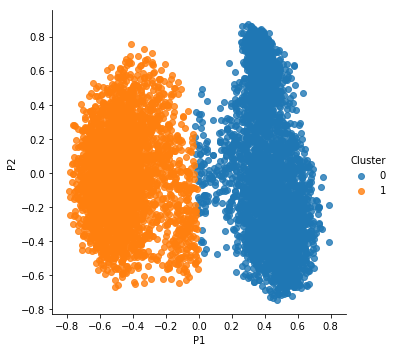

In [112]:
import seaborn as sns
facet = sns.lmplot(data=result,x='P1',y='P2',hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)

In [117]:
result['Cluster'].value_counts()

0    3411
1    3152
Name: Cluster, dtype: int64